In [30]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import yaml

from data_loader import TrainDataModule, get_all_test_dataloaders
from trainer import PatchCoreModel

# autoreload imported modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


note: check seeds of everything (bc i wont use pl train)

In [31]:
with open('./configs/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Reproducibility
pl.seed_everything(config['seed'])

Global seed set to 42


42

Using 711 IXI images and 130 fastMRI images for training. Using 15 images for validation.
Batch shape: torch.Size([32, 3, 128, 128])
Batch min: 0.0
Batch max: 1.0


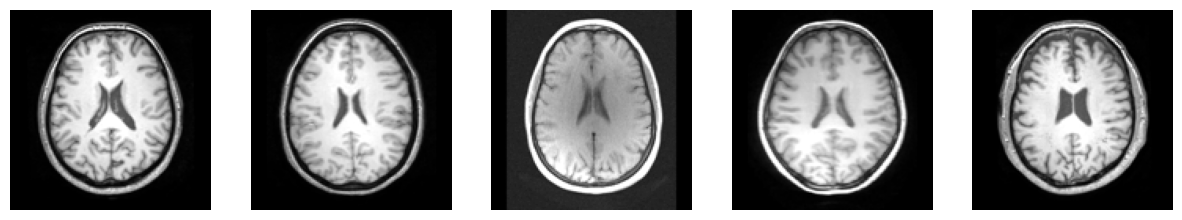

In [32]:
train_data_module = TrainDataModule(
    split_dir=config['split_dir'],
    target_size=config['target_size'],
    batch_size=config['batch_size'])

# Plot some images
batch = next(iter(train_data_module.train_dataloader()))

# Print statistics
print(f"Batch shape: {batch.shape}")
print(f"Batch min: {batch.min()}")
print(f"Batch max: {batch.max()}")

fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(batch[i,0], cmap='gray')
    ax[i].axis('off')
plt.show()

In [ ]:
#%load_ext tensorboard
#%tensorboard --logdir lightning_logs/

In [ ]:
# Init model
model = PatchCoreModel(
    config['seed'],
    config['split_dir'],
    config['target_size'],
    config['batch_size'],
    config['sampling_percentage'],
    config['backbone'],
    ["layer2","layer3"],
    config['neighbour_num'],
    config['pathologies'])
    
model.train()

Using 711 IXI images and 130 fastMRI images for training. Using 15 images for validation.
sampler created


c:\Users\Emine\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Emine\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


backbone loaded
nn method created
created instance
model loaded


Subsampling...:  12%|█▏        | 2503/21529 [05:21<40:44,  7.78it/s]  


KeyboardInterrupt: 

Batch shape: torch.Size([18, 3, 128, 128])


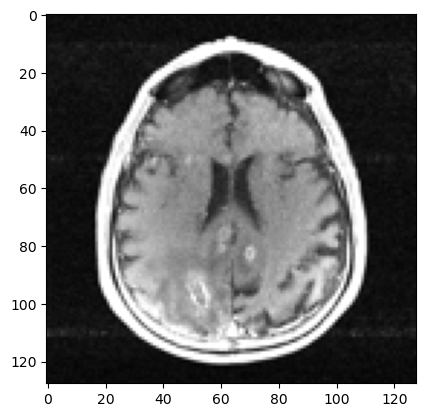

In [37]:
# get test dataloaders
test_dataloaders = model.get_test_dataloaders()

# get the test dataloader for the first disease
test_dataloader = test_dataloaders[config['diseases'][1]]

# get the first batch
batch = next(iter(test_dataloader))
print(f"Batch shape: {batch['image'].shape}")

img = batch['image'][0]

# show a picture from the batch
plt.imshow(batch['image'][0][0], cmap='gray')



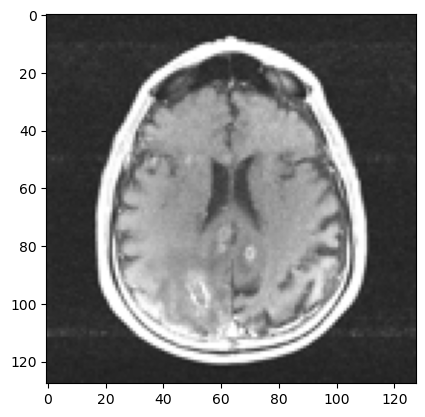

In [43]:
img_np = img.numpy().transpose(1,2,0)
plt.imshow(img_np)